In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv("/content/drive/MyDrive/dataset/column_2C_weka.csv")

In [6]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [7]:
#check for missing values
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [8]:
#remove missing values
data.dropna(inplace=True)

In [9]:
#check for duplicate
data.duplicated().sum()

0

In [10]:
#remove duplicated
data.drop_duplicates(inplace=True)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [12]:
data.head

<bound method NDFrame.head of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal  

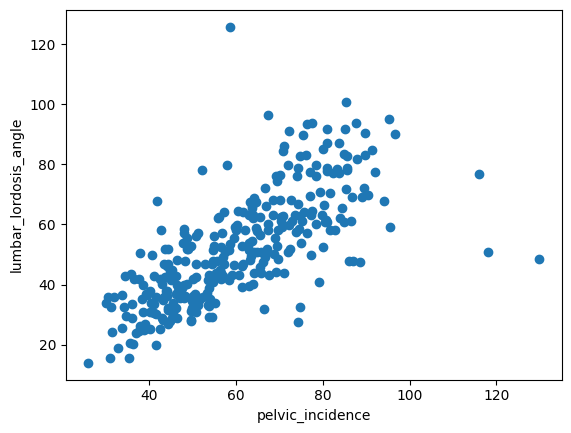

In [13]:
plt.scatter(data.pelvic_incidence,data.lumbar_lordosis_angle)
plt.xlabel("pelvic_incidence")
plt.ylabel("lumbar_lordosis_angle")
plt.show()

In [14]:
x=data.pelvic_incidence.values

In [15]:
x.shape

(310,)

In [16]:
x=data.pelvic_incidence.values.reshape(-1,1)
y=data.lumbar_lordosis_angle.values.reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x,y)

LinearRegression()

In [18]:
#prediction
import numpy as np

b0 = linear_reg.predict([[0]]) #fit edilen line'ın b0 değişkenine yani y eksenini kestiği noktaya bakılır.
print("b0: ",b0)

b0:  [[5.22081272]]


In [19]:
b0_ = linear_reg.intercept_
print("b0: ",b0_)

b0:  [5.22081272]


In [20]:
b1= linear_reg.coef_
print("b1: ",b1)

b1:  [[0.77211076]]


In [22]:
b11 = linear_reg.predict([[11]])
print("b11: ",b11)

b11:  [[13.71403112]]


In [23]:
y_head = linear_reg.predict(x)

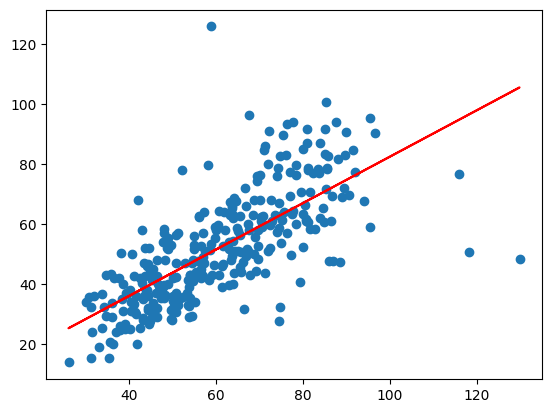

In [24]:
plt.plot(x,y_head,color="red")
plt.scatter(x,y)
plt.show()

In [25]:
from sklearn.metrics import r2_score
print("R square score:  ",r2_score(y,y_head))

R square score:   0.5144939900985694


In [26]:
from sklearn.metrics import mean_squared_error
print("Mean squared Error: ",mean_squared_error(y,y_head))

Mean squared Error:  166.59788925205507


In [28]:
MSE = np.square(np.subtract(y,y_head)).mean()
print("mean squared error: ",MSE)

mean squared error:  166.59788925205507
